# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

# Importing libraries

In [409]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [410]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)
dataset2 = pd.read_csv(url)
dataset3 = pd.read_csv(url)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data

In [411]:
print("dataset 1:", dataset.shape)
print("dataset 2:", dataset.shape)
print("dataset 3:", dataset.shape)

dataset 1: (150, 5)
dataset 2: (150, 5)
dataset 3: (150, 5)


Drop rows with any missing values

In [412]:
dataset = dataset.dropna()
dataset2 = dataset2.dropna()
dataset3 = dataset3.dropna()


print("dataset 1:", dataset.shape)
print("dataset 2:", dataset.shape)
print("dataset 3:", dataset.shape)



dataset 1: (150, 5)
dataset 2: (150, 5)
dataset 3: (150, 5)


In [413]:
dataset["Class"] = dataset.Class.replace({"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}) 
dataset2["Class"] = dataset2.Class.replace({"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}) 
dataset3["Class"] = dataset3.Class.replace({"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}) 



# Drop out non necesary columns
dataset.drop(['Sepal Length', 'Sepal Width'],axis='columns',inplace=True)
dataset2.drop(['Petal Length', 'Petal Width'],axis='columns',inplace=True)

#Visualize the dataset

### Petals

In [414]:
dataset.head(10)

,Petal Length,Petal Width,Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


### Sepals

In [415]:
dataset2.head(10)

,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


###  Petals y Sepals

In [416]:
dataset3.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Petals

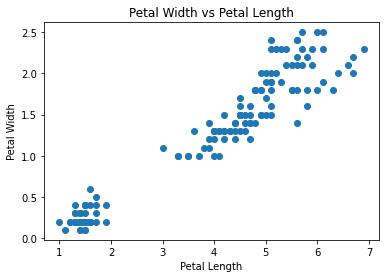

In [417]:
plt.scatter(dataset["Petal Length"],dataset["Petal Width"])

plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Sepals

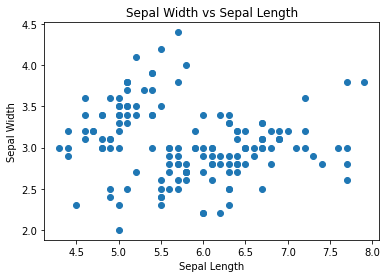

In [418]:
plt.scatter(dataset2["Sepal Length"],dataset2["Sepal Width"])
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Petals

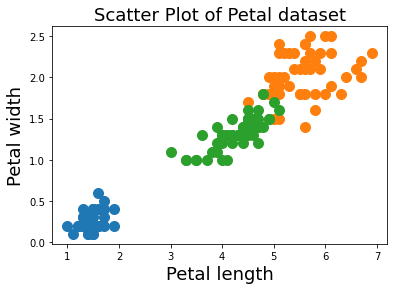

In [419]:
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1['Petal Length'], df1['Petal Width'], s=100)
plt.scatter(df2['Petal Length'], df2['Petal Width'], s = 100)
plt.scatter(df3['Petal Length'], df3['Petal Width'], s= 100)

plt.title("Scatter Plot of Petal dataset", fontsize = 18)
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)

plt.show()

### Sepals

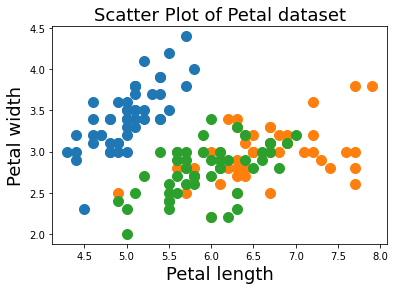

In [420]:
df1 = dataset2[dataset2.Class==0]
df2 = dataset2[dataset2.Class==1]
df3 = dataset2[dataset2.Class==2]

plt.scatter(df1['Sepal Length'], df1['Sepal Width'], s=100)
plt.scatter(df2['Sepal Length'], df2['Sepal Width'], s = 100)
plt.scatter(df3['Sepal Length'], df3['Sepal Width'], s= 100)

plt.title("Scatter Plot of Petal dataset", fontsize = 18)
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)

plt.show()

# Kmeans clustering
### Petals

Kmeans clustering

In [421]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

k = 3

# Define number of clusters
km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal Length','Petal Width']])


In [422]:
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [423]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

In [424]:
dataset

,Petal Length,Petal Width,Class,Cluster1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,1,1
146,5.0,1.9,1,1
147,5.2,2.0,1,1
148,5.4,2.3,1,1


In [425]:
dataset.Cluster1.unique()

array([0, 2, 1], dtype=int32)

In [426]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [427]:
km.inertia_

31.371358974358966

# Plot estimated clusters

Plot estimated clusters

<ipython-input-428-a499bb663732>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Petal Length'], df1['Petal Width'], Label='Estimated Group 1')
<ipython-input-428-a499bb663732>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Petal Length'], df2['Petal Width'], Label='Estimated Group 2')
<ipython-input-428-a499bb663732>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Petal Length'], df3['Petal Width'], Label='Estimated Group 3')


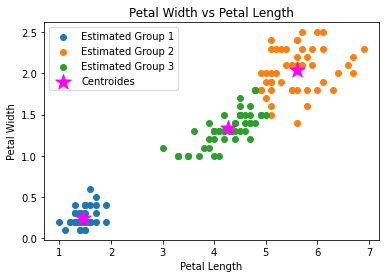

In [428]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]



plt.scatter(df1['Petal Length'], df1['Petal Width'], Label='Estimated Group 1')
plt.scatter(df2['Petal Length'], df2['Petal Width'], Label='Estimated Group 2')
plt.scatter(df3['Petal Length'], df3['Petal Width'], Label='Estimated Group 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# Kmeans clustering 2
### Sepals



Kmeans clustering

In [429]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

k = 3

# Define number of clusters
km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['Sepal Length','Sepal Width']])

In [430]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster1'] = yp

In [431]:
dataset2

,Sepal Length,Sepal Width,Class,Cluster1
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1
...,...,...,...,...
145,6.7,3.0,1,2
146,6.3,2.5,1,0
147,6.5,3.0,1,2
148,6.2,3.4,1,2


In [432]:
dataset2.Cluster1.unique()

array([1, 2, 0], dtype=int32)

In [433]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [434]:
km.inertia_

37.0507021276596

# Plot estimated clusters 2

Plot estimated clusters

<ipython-input-435-2050feb4a4cd>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Sepal Length'], df1['Sepal Width'], Label='Estimated Group 1')
<ipython-input-435-2050feb4a4cd>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Sepal Length'], df2['Sepal Width'], Label='Estimated Group 2')
<ipython-input-435-2050feb4a4cd>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Sepal Length'], df3['Sepal Width'], Label='Estimated Group 3')


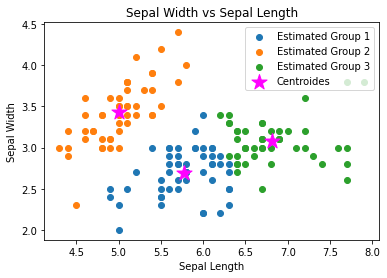

In [435]:
df1 = dataset2[dataset2.Cluster1==0]
df2 = dataset2[dataset2.Cluster1==1]
df3 = dataset2[dataset2.Cluster1==2]



plt.scatter(df1['Sepal Length'], df1['Sepal Width'], Label='Estimated Group 1')
plt.scatter(df2['Sepal Length'], df2['Sepal Width'], Label='Estimated Group 2')
plt.scatter(df3['Sepal Length'], df3['Sepal Width'], Label='Estimated Group 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Kmeans clustering 3
### Sepals y Petals



Kmeans clustering

In [436]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

k = 3

# Define number of clusters
km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset3[['Sepal Length','Sepal Width','Petal Length','Petal Width']])

In [437]:
dataset3['Cluster1'] = yp

In [438]:
dataset3

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Cluster1
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,2
146,6.3,2.5,5.0,1.9,1,0
147,6.5,3.0,5.2,2.0,1,2
148,6.2,3.4,5.4,2.3,1,2


In [439]:
dataset3.Cluster1.unique()

array([1, 0, 2], dtype=int32)

In [440]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [441]:
km.inertia_

78.851441426146

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

### Petals

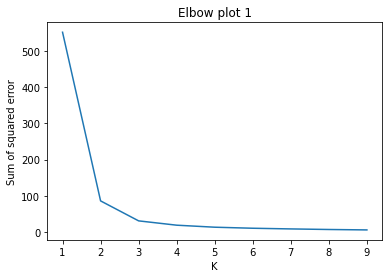

In [442]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['Petal Length', 'Petal Width']])
    sse.append(km.inertia_)
    
plt.plot(k_rng, sse)

plt.title('Elbow plot 1')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Sepals

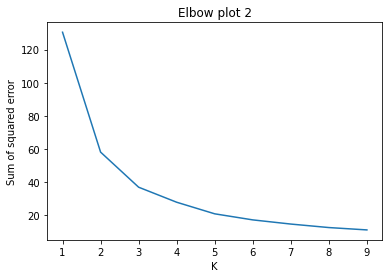

In [443]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset2[['Sepal Length', 'Sepal Width']])
    sse.append(km.inertia_)
    
plt.plot(k_rng, sse)

plt.title('Elbow plot 2')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
splt.show()

### Sepals y Petals

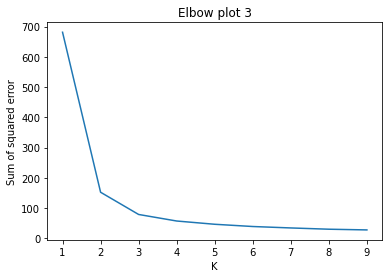

In [444]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset3[['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width']])
    sse.append(km.inertia_)
    
plt.plot(k_rng, sse)

plt.title('Elbow plot 3')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

### Petals

In [448]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['Petal Length']])
dataset['Petal Length'] = scaler.transform(dataset[['Petal Length']])

scaler.fit(dataset[['Petal Width']])
dataset['Petal Width'] = scaler.transform(dataset[['Petal Width']])

dataset

,Petal Length,Petal Width,Class,Cluster1
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,1,1
146,0.677966,0.750000,1,1
147,0.711864,0.791667,1,1
148,0.745763,0.916667,1,1


### Sepals

In [450]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

scaler.fit(dataset2[['Sepal Length']])
dataset2['Sepal Length'] = scaler.transform(dataset2[['Sepal Length']])

scaler.fit(dataset2[['Sepal Width']])
dataset2['Sepal Width'] = scaler.transform(dataset2[['Sepal Width']])

dataset2

,Sepal Length,Sepal Width,Class,Cluster1
0,0.222222,0.625000,0,1
1,0.166667,0.416667,0,1
2,0.111111,0.500000,0,1
3,0.083333,0.458333,0,1
4,0.194444,0.666667,0,1
...,...,...,...,...
145,0.666667,0.416667,1,2
146,0.555556,0.208333,1,0
147,0.611111,0.416667,1,2
148,0.527778,0.583333,1,2


In [465]:
Sepals y Petals

SyntaxError: invalid syntax (<ipython-input-465-1a40e716824b>, line 1)

In [455]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset3[['Petal Length']])
dataset3['Petal Length'] = scaler.transform(dataset3[['Petal Length']])

scaler.fit(dataset3[['Petal Width']])
dataset3['Petal Width'] = scaler.transform(dataset3[['Petal Width']])

scaler.fit(dataset3[['Sepal Length']])
dataset3['Sepal Length'] = scaler.transform(dataset3[['Sepal Length']])

scaler.fit(dataset3[['Sepal Width']])
dataset3['Sepal Width'] = scaler.transform(dataset3[['Sepal Width']])

dataset3

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Cluster1
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1,2
146,0.555556,0.208333,0.677966,0.750000,1,0
147,0.611111,0.416667,0.711864,0.791667,1,2
148,0.527778,0.583333,0.745763,0.916667,1,2


In [404]:
dataset.describe()

,Petal Length,Petal Width,Class,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,0.973333
std,0.299203,0.317599,0.819232,0.818795
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


In [405]:
dataset2.describe()

,Sepal Length,Sepal Width,Class,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,3.057333,1.000000,0.980000
std,0.230018,0.435866,0.819232,0.831187
min,0.000000,2.000000,0.000000,0.000000
25%,0.222222,2.800000,0.000000,0.000000
50%,0.416667,3.000000,1.000000,1.000000
75%,0.583333,3.300000,2.000000,2.000000
max,1.000000,4.400000,2.000000,2.000000


In [406]:
dataset3.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Cluster1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.840000
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.803349
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,1.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


### Petals

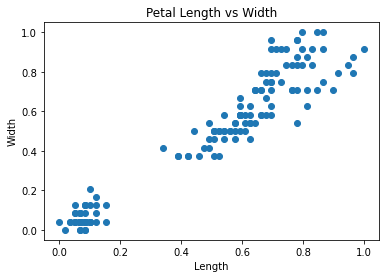

In [407]:
plt.scatter(dataset['Petal Length'],dataset['Petal Width'])
plt.title('Petal Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

### Sepals

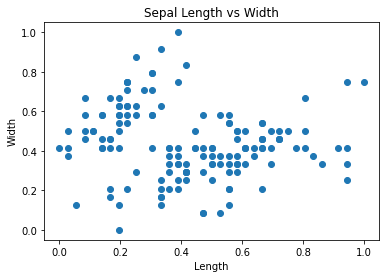

In [458]:
plt.scatter(dataset2['Sepal Length'],dataset2['Sepal Width'])
plt.title('Sepal Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

### Petals

In [457]:
#Initialize model and define number of clusters
k = 3

km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal Length','Petal Width']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [460]:
dataset['Cluster2'] = yp

dataset

,Petal Length,Petal Width,Class,Cluster1,Cluster2
0,0.067797,0.041667,0,0,1
1,0.067797,0.041667,0,0,1
2,0.050847,0.041667,0,0,1
3,0.084746,0.041667,0,0,1
4,0.067797,0.041667,0,0,1
...,...,...,...,...,...
145,0.711864,0.916667,1,1,2
146,0.677966,0.750000,1,1,2
147,0.711864,0.791667,1,1,2
148,0.745763,0.916667,1,1,2


<ipython-input-461-29f328166739>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Petal Length'], df1['Petal Width'], Label='Estimated Group 1')
<ipython-input-461-29f328166739>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Petal Length'], df2['Petal Width'], Label='Estimated Group 2')
<ipython-input-461-29f328166739>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Petal Length'], df3['Petal Width'], Label='Estimated Group 3')


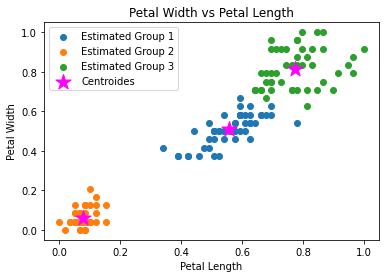

In [461]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]



plt.scatter(df1['Petal Length'], df1['Petal Width'], Label='Estimated Group 1')
plt.scatter(df2['Petal Length'], df2['Petal Width'], Label='Estimated Group 2')
plt.scatter(df3['Petal Length'], df3['Petal Width'], Label='Estimated Group 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

### Sepals

In [462]:
#Initialize model and define number of clusters
k = 3

km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['Sepal Length','Sepal Width']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [463]:
dataset2['Cluster2'] = yp

dataset2

,Sepal Length,Sepal Width,Class,Cluster1,Cluster2
0,0.222222,0.625000,0,1,0
1,0.166667,0.416667,0,1,0
2,0.111111,0.500000,0,1,0
3,0.083333,0.458333,0,1,0
4,0.194444,0.666667,0,1,0
...,...,...,...,...,...
145,0.666667,0.416667,1,2,2
146,0.555556,0.208333,1,0,1
147,0.611111,0.416667,1,2,2
148,0.527778,0.583333,1,2,2


<ipython-input-464-5d8a920cd8f4>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Sepal Length'], df1['Sepal Width'], Label='Estimated Group 1')
<ipython-input-464-5d8a920cd8f4>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Sepal Length'], df2['Sepal Width'], Label='Estimated Group 2')
<ipython-input-464-5d8a920cd8f4>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Sepal Length'], df3['Sepal Width'], Label='Estimated Group 3')


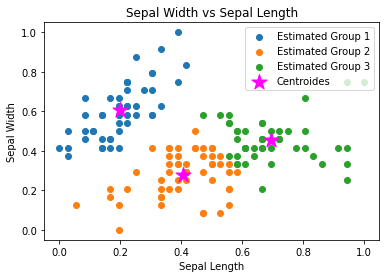

In [464]:
df1 = dataset2[dataset2.Cluster2==0]
df2 = dataset2[dataset2.Cluster2==1]
df3 = dataset2[dataset2.Cluster2==2]



plt.scatter(df1['Sepal Length'], df1['Sepal Width'], Label='Estimated Group 1')
plt.scatter(df2['Sepal Length'], df2['Sepal Width'], Label='Estimated Group 2')
plt.scatter(df3['Sepal Length'], df3['Sepal Width'], Label='Estimated Group 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Conclusiones

### About the scalling: does it helps or not?
En los casos de Petal y Sepal fue de poca ayuda ya que los datos que estaban en el dataset eran pocos.
### About the elbow plot: does the K agree with the real number of clusters?
Si, ya que al realizar el elbow plot me pude dar cuenta que los numeros adecuados rondaban entre el 2 y 3 ya que la diferencia entre el 3 y 4 era muy poca.
### Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
Las caracteristicas de los sepalos de cada flor fue un poco mas complicado para realizar el cluster ya que habia muchos datos que se solapaban entre ellos, las de los Petals fue un poco mas facil de realizar los clusters debido a que los datos eran poco mas diferentes; finalmente el de utilizar ambas caracteristicas no fue tan eficiente realizar ya que no habia mucha correlación entre ellas.